## Import Libraries

In [1]:
from karateclub import GraphReader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pyprind
from pyprind import ProgBar
import random as pyrandom
pyrandom.seed(1)
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)
%matplotlib inline

## Read the Graph

In [2]:
reader = GraphReader("facebook")

graph = reader.get_graph()
target = reader.get_target()

In [3]:
graph.number_of_nodes()

22470

## DeepWalk Graph Embedding and ML

In [4]:
from karateclub import DeepWalk
deepwalk = DeepWalk(walk_length=100, dimensions=256)
deepwalk.fit(graph)

In [5]:
from sklearn.model_selection import train_test_split
X = deepwalk.get_embedding()
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(acc))
print(classification_report(y_test, y_pred))

Accuracy: 0.7232
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1340
           1       0.65      0.52      0.58       671
           2       0.70      0.71      0.71      1125
           3       0.77      0.78      0.78      1358

    accuracy                           0.72      4494
   macro avg       0.71      0.70      0.70      4494
weighted avg       0.72      0.72      0.72      4494



### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(acc))
print(classification_report(y_test, y_pred))

Accuracy: 0.6302
              precision    recall  f1-score   support

           0       0.61      0.75      0.67      1340
           1       0.89      0.13      0.22       671
           2       0.66      0.54      0.59      1125
           3       0.62      0.83      0.71      1358

    accuracy                           0.63      4494
   macro avg       0.70      0.56      0.55      4494
weighted avg       0.67      0.63      0.60      4494



### Shallow Neural Network

In [10]:
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
neural_net.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [11]:
y_pred = neural_net.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(acc))
print(classification_report(y_test, y_pred))

Accuracy: 0.8062
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1340
           1       0.71      0.71      0.71       671
           2       0.83      0.81      0.82      1125
           3       0.82      0.84      0.83      1358

    accuracy                           0.81      4494
   macro avg       0.79      0.79      0.79      4494
weighted avg       0.81      0.81      0.81      4494




### Deeper Neural Network with Keras

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import *

Using TensorFlow backend.


In [13]:
model = Sequential()
model.add(Dense(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor="val_loss",
    patience=2,
    verbose=2,
    mode="min")
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor="val_loss",
    patience=2,
    verbose=2,
    mode="min")

In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model.fit(X_train, y_train_cat, 
          validation_data=(X_test, y_test_cat),
          batch_size=32, epochs=10,
         callbacks=[early_stopping])

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 230us/step - loss: 1.1348 - accuracy: 0.5797 - val_loss: 0.9645 - val_accuracy: 0.7061
Epoch 2/10
17976/17976 [==============================] - 3s 174us/step - loss: 0.8835 - accuracy: 0.7190 - val_loss: 0.8018 - val_accuracy: 0.7468
Epoch 3/10
17976/17976 [==============================] - 3s 176us/step - loss: 0.7276 - accuracy: 0.7714 - val_loss: 0.7146 - val_accuracy: 0.7597
Epoch 4/10
17976/17976 [==============================] - 3s 179us/step - loss: 0.6162 - accuracy: 0.8055 - val_loss: 0.6779 - val_accuracy: 0.7615
Epoch 5/10
17976/17976 [==============================] - 3s 180us/step - loss: 0.5328 - accuracy: 0.8348 - val_loss: 0.6298 - val_accuracy: 0.7848
Epoch 6/10
17976/17976 [==============================] - 3s 182us/step - loss: 0.4646 - accuracy: 0.8590 - val_loss: 0.6131 - val_accuracy: 0.7897
Epoch 7/10
17976/17976 [==============================] - 3s 18

In [15]:
evaluation = model.evaluate(X_test, y_test_cat)
print('Accuracy: {:.4f}'.format(evaluation[1]))

4494/4494 [==============================] - 0s 51us/step
Accuracy: 0.8024


## Walklets Embedding and ML

In [16]:
from karateclub import Walklets
walklet_embedder = Walklets(dimensions=128)
walklet_embedder.fit(graph)

In [17]:
X = walklet_embedder.get_embedding()
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/amol/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(acc))
print(classification_report(y_test, y_pred))

Accuracy: 0.9166
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1340
           1       0.89      0.85      0.87       671
           2       0.94      0.94      0.94      1125
           3       0.92      0.93      0.92      1358

    accuracy                           0.92      4494
   macro avg       0.91      0.91      0.91      4494
weighted avg       0.92      0.92      0.92      4494



### Shallow Neural Network

In [20]:
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier(hidden_layer_sizes=(100, 100, 100))
neural_net.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [21]:
y_pred = neural_net.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(acc))
print(classification_report(y_test, y_pred))

Accuracy: 0.9310
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1340
           1       0.93      0.86      0.89       671
           2       0.96      0.94      0.95      1125
           3       0.94      0.94      0.94      1358

    accuracy                           0.93      4494
   macro avg       0.93      0.92      0.93      4494
weighted avg       0.93      0.93      0.93      4494



### Deep Neural Network with Keras

In [22]:
model = Sequential()
model.add(Dense(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor="val_loss",
    patience=2,
    verbose=2,
    mode="min")

In [23]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model.fit(X_train, y_train_cat, 
          validation_data=(X_test, y_test_cat),
          batch_size=32, epochs=10,
         callbacks=[early_stopping])

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 240us/step - loss: 0.3757 - accuracy: 0.8748 - val_loss: 0.2926 - val_accuracy: 0.9092
Epoch 2/10
17976/17976 [==============================] - 3s 190us/step - loss: 0.2689 - accuracy: 0.9105 - val_loss: 0.2766 - val_accuracy: 0.9097
Epoch 3/10
17976/17976 [==============================] - 3s 192us/step - loss: 0.2331 - accuracy: 0.9211 - val_loss: 0.2616 - val_accuracy: 0.9146
Epoch 4/10
17976/17976 [==============================] - 3s 192us/step - loss: 0.2123 - accuracy: 0.9300 - val_loss: 0.2381 - val_accuracy: 0.9221
Epoch 5/10
17976/17976 [==============================] - 3s 194us/step - loss: 0.1932 - accuracy: 0.9364 - val_loss: 0.2345 - val_accuracy: 0.9255
Epoch 6/10
17976/17976 [==============================] - 3s 193us/step - loss: 0.1850 - accuracy: 0.9375 - val_loss: 0.2342 - val_accuracy: 0.9275
Epoch 7/10
17976/17976 [==============================] - 3s 19

In [24]:
evaluation = model.evaluate(X_test, y_test_cat)
print('Accuracy: {:.4f}'.format(evaluation[1]))

4494/4494 [==============================] - 0s 48us/step
Accuracy: 0.9324


In [25]:
type(model) == keras.engine.sequential.Sequential

True

In [26]:
y_test_cat.shape[1]

4

## Hyperparameter Tuning

In [27]:
def build_keras_neural_net(embedding_dimensions, n_classes):
    
    model = Sequential()
    model.add(Dense(embedding_dimensions))
    model.add(Dense(embedding_dimensions, activation='relu'))
    model.add(Dense(embedding_dimensions, activation='relu'))
    model.add(Dense(embedding_dimensions, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [28]:
def evaluate_graph_model(ml_model, walk_length, embedding_dimensions, graph, target):
    
    embedding_model = Walklets(walk_length = walk_length, dimensions = embedding_dimensions)
    embedding_model.fit(graph)
    X = embedding_model.get_embedding()
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if ml_model == 'neural network':
        
        y_train_cat = to_categorical(y_train)
        y_test_cat = to_categorical(y_test)
        n_classes = y_test_cat.shape[1]
        ml_model = build_keras_neural_net(embedding_dimensions, n_classes)
        
        early_stopping = EarlyStopping(monitor="val_loss", patience=2, verbose=2, mode="min")
        
        ml_model.fit(X_train, y_train_cat, 
          validation_data=(X_test, y_test_cat),
          batch_size=32, epochs=10,
         callbacks=[early_stopping])
        
        score = ml_model.evaluate(X_test, y_test_cat)
        
        return score
    
    else:
        
        ml_model.fit(X_train, y_train)
        y_pred = neural_net.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        return acc

def grid_search(ml_model, param_grid, graph, target):
    
    walk_lengths = param_grid['walk_length']
    embedding_dimension_vals = param_grid['embedding_dimensions']
    
    rows = []
    
    n = len(walk_lengths) * len(embedding_dimension_vals)
    pbar = ProgBar(n, track_time=True, monitor=True)
    
    for walk_length in walk_lengths:
        for embedding_dimensions in embedding_dimension_vals:
            score = evaluate_graph_model(ml_model, walk_length, embedding_dimensions, graph, target)
            data_dict = {'walk_length': walk_length, 
                         'embedding_dimensions': embedding_dimensions, 
                         'accuracy': score[1]}
            
            rows.append(data_dict)
            pbar.update()
            
    print(pbar)
    return pd.DataFrame(rows) 

In [29]:
param_dict = {'walk_length': [40, 50, 60, 70, 80],
              'embedding_dimensions': [80, 90, 100, 110, 120, 130, 140, 150, 160]}

results = grid_search('neural network', param_dict, graph, target)

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 3s 180us/step - loss: 0.4272 - accuracy: 0.8587 - val_loss: 0.3085 - val_accuracy: 0.8972
Epoch 2/10
17976/17976 [==============================] - 2s 134us/step - loss: 0.3040 - accuracy: 0.8975 - val_loss: 0.3044 - val_accuracy: 0.9012
Epoch 3/10
17976/17976 [==============================] - 2s 138us/step - loss: 0.2684 - accuracy: 0.9102 - val_loss: 0.2649 - val_accuracy: 0.9083
Epoch 4/10
17976/17976 [==============================] - 2s 139us/step - loss: 0.2454 - accuracy: 0.9155 - val_loss: 0.2805 - val_accuracy: 0.9023
Epoch 5/10
17976/17976 [==============================] - 3s 142us/step - loss: 0.2301 - accuracy: 0.9215 - val_loss: 0.2544 - val_accuracy: 0.9139
Epoch 6/10
17976/17976 [==============================] - 3s 142us/step - loss: 0.2121 - accuracy: 0.9281 - val_loss: 0.2434 - val_accuracy: 0.9215
Epoch 7/10
17976/17976 [==============================] - 3s 14

0% [#                             ] 100% | ETA: 01:45:03

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 207us/step - loss: 0.4265 - accuracy: 0.8583 - val_loss: 0.3135 - val_accuracy: 0.8934
Epoch 2/10
17976/17976 [==============================] - 3s 158us/step - loss: 0.2996 - accuracy: 0.8985 - val_loss: 0.3037 - val_accuracy: 0.9043
Epoch 3/10
17976/17976 [==============================] - 3s 160us/step - loss: 0.2673 - accuracy: 0.9093 - val_loss: 0.2657 - val_accuracy: 0.9101
Epoch 4/10
17976/17976 [==============================] - 3s 164us/step - loss: 0.2445 - accuracy: 0.9182 - val_loss: 0.2768 - val_accuracy: 0.9041
Epoch 5/10
17976/17976 [==============================] - 3s 164us/step - loss: 0.2270 - accuracy: 0.9227 - val_loss: 0.2601 - val_accuracy: 0.9121
Epoch 6/10
17976/17976 [==============================] - 3s 168us/step - loss: 0.2125 - accuracy: 0.9265 - val_loss: 0.2712 - val_accuracy: 0.9085
Epoch 7/10
17976/17976 [==============================] - 3s 16

0% [##                            ] 100% | ETA: 01:44:15

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 221us/step - loss: 0.4231 - accuracy: 0.8603 - val_loss: 0.3264 - val_accuracy: 0.8872
Epoch 2/10
17976/17976 [==============================] - 3s 174us/step - loss: 0.3029 - accuracy: 0.8982 - val_loss: 0.2994 - val_accuracy: 0.9083
Epoch 3/10
17976/17976 [==============================] - 3s 181us/step - loss: 0.2697 - accuracy: 0.9094 - val_loss: 0.2661 - val_accuracy: 0.9110
Epoch 4/10
17976/17976 [==============================] - 3s 181us/step - loss: 0.2462 - accuracy: 0.9168 - val_loss: 0.3245 - val_accuracy: 0.8832
Epoch 5/10
17976/17976 [==============================] - 3s 184us/step - loss: 0.2289 - accuracy: 0.9217 - val_loss: 0.2499 - val_accuracy: 0.9159
Epoch 6/10
17976/17976 [==============================] - 3s 186us/step - loss: 0.2156 - accuracy: 0.9250 - val_loss: 0.2777 - val_accuracy: 0.9068
Epoch 7/10
17976/17976 [==============================] - 3s 18

0% [###                           ] 100% | ETA: 01:45:47

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 281us/step - loss: 0.4222 - accuracy: 0.8596 - val_loss: 0.3287 - val_accuracy: 0.8923
Epoch 2/10
17976/17976 [==============================] - 4s 205us/step - loss: 0.2983 - accuracy: 0.8997 - val_loss: 0.3179 - val_accuracy: 0.8941
Epoch 3/10
17976/17976 [==============================] - 4s 211us/step - loss: 0.2708 - accuracy: 0.9080 - val_loss: 0.2769 - val_accuracy: 0.9077
Epoch 4/10
17976/17976 [==============================] - 4s 213us/step - loss: 0.2442 - accuracy: 0.9159 - val_loss: 0.2801 - val_accuracy: 0.9050
Epoch 5/10
17976/17976 [==============================] - 4s 212us/step - loss: 0.2288 - accuracy: 0.9211 - val_loss: 0.2403 - val_accuracy: 0.9226
Epoch 6/10
17976/17976 [==============================] - 4s 216us/step - loss: 0.2155 - accuracy: 0.9253 - val_loss: 0.2638 - val_accuracy: 0.9161
Epoch 7/10
17976/17976 [==============================] - 4s 21

0% [####                          ] 100% | ETA: 01:48:26

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 6s 310us/step - loss: 0.4208 - accuracy: 0.8609 - val_loss: 0.3591 - val_accuracy: 0.8769
Epoch 2/10
17976/17976 [==============================] - 4s 237us/step - loss: 0.3049 - accuracy: 0.8966 - val_loss: 0.3091 - val_accuracy: 0.8994
Epoch 3/10
17976/17976 [==============================] - 5s 271us/step - loss: 0.2734 - accuracy: 0.9090 - val_loss: 0.2730 - val_accuracy: 0.9081
Epoch 4/10
17976/17976 [==============================] - 5s 251us/step - loss: 0.2465 - accuracy: 0.9176 - val_loss: 0.2948 - val_accuracy: 0.8947
Epoch 5/10
17976/17976 [==============================] - 4s 249us/step - loss: 0.2273 - accuracy: 0.9215 - val_loss: 0.2508 - val_accuracy: 0.9168
Epoch 6/10
17976/17976 [==============================] - 5s 253us/step - loss: 0.2154 - accuracy: 0.9255 - val_loss: 0.2708 - val_accuracy: 0.9072
Epoch 7/10
17976/17976 [==============================] - 5s 25

0% [#####                         ] 100% | ETA: 01:48:57

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 6s 311us/step - loss: 0.4265 - accuracy: 0.8581 - val_loss: 0.3346 - val_accuracy: 0.8923
Epoch 2/10
17976/17976 [==============================] - 4s 233us/step - loss: 0.3033 - accuracy: 0.8983 - val_loss: 0.3077 - val_accuracy: 0.8983
Epoch 3/10
17976/17976 [==============================] - 4s 239us/step - loss: 0.2731 - accuracy: 0.9091 - val_loss: 0.2738 - val_accuracy: 0.9085
Epoch 4/10
17976/17976 [==============================] - 4s 242us/step - loss: 0.2453 - accuracy: 0.9194 - val_loss: 0.3186 - val_accuracy: 0.8899
Epoch 5/10
17976/17976 [==============================] - 4s 245us/step - loss: 0.2332 - accuracy: 0.9196 - val_loss: 0.2366 - val_accuracy: 0.9199
Epoch 6/10
17976/17976 [==============================] - 4s 246us/step - loss: 0.2157 - accuracy: 0.9256 - val_loss: 0.2811 - val_accuracy: 0.9088
Epoch 7/10
17976/17976 [==============================] - 4s 24

0% [######                        ] 100% | ETA: 01:47:50

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 231us/step - loss: 0.4292 - accuracy: 0.8559 - val_loss: 0.3056 - val_accuracy: 0.9023
Epoch 2/10
17976/17976 [==============================] - 3s 152us/step - loss: 0.2938 - accuracy: 0.9019 - val_loss: 0.2900 - val_accuracy: 0.9057
Epoch 3/10
17976/17976 [==============================] - 3s 152us/step - loss: 0.2571 - accuracy: 0.9143 - val_loss: 0.2511 - val_accuracy: 0.9188
Epoch 4/10
17976/17976 [==============================] - 3s 154us/step - loss: 0.2394 - accuracy: 0.9187 - val_loss: 0.2709 - val_accuracy: 0.9072
Epoch 5/10
17976/17976 [==============================] - 3s 156us/step - loss: 0.2173 - accuracy: 0.9252 - val_loss: 0.2365 - val_accuracy: 0.9210
Epoch 6/10
17976/17976 [==============================] - 3s 157us/step - loss: 0.2037 - accuracy: 0.9311 - val_loss: 0.2399 - val_accuracy: 0.9248
Epoch 7/10
17976/17976 [==============================] - 3s 15

0% [#######                       ] 100% | ETA: 01:47:01

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 248us/step - loss: 0.4110 - accuracy: 0.8644 - val_loss: 0.2966 - val_accuracy: 0.9048
Epoch 2/10
17976/17976 [==============================] - 3s 168us/step - loss: 0.2885 - accuracy: 0.9028 - val_loss: 0.2751 - val_accuracy: 0.9083
Epoch 3/10
17976/17976 [==============================] - 3s 172us/step - loss: 0.2536 - accuracy: 0.9169 - val_loss: 0.2556 - val_accuracy: 0.9159
Epoch 4/10
17976/17976 [==============================] - 3s 177us/step - loss: 0.2346 - accuracy: 0.9202 - val_loss: 0.2782 - val_accuracy: 0.9068
Epoch 5/10
17976/17976 [==============================] - 3s 179us/step - loss: 0.2168 - accuracy: 0.9242 - val_loss: 0.2381 - val_accuracy: 0.9203
Epoch 6/10
17976/17976 [==============================] - 3s 177us/step - loss: 0.2003 - accuracy: 0.9299 - val_loss: 0.2387 - val_accuracy: 0.9270
Epoch 7/10
17976/17976 [==============================] - 3s 18

0% [########                      ] 100% | ETA: 01:45:59

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 268us/step - loss: 0.4063 - accuracy: 0.8645 - val_loss: 0.2970 - val_accuracy: 0.9023
Epoch 2/10
17976/17976 [==============================] - 3s 188us/step - loss: 0.2891 - accuracy: 0.9034 - val_loss: 0.2814 - val_accuracy: 0.9074
Epoch 3/10
17976/17976 [==============================] - 3s 193us/step - loss: 0.2545 - accuracy: 0.9156 - val_loss: 0.2415 - val_accuracy: 0.9194
Epoch 4/10
17976/17976 [==============================] - 4s 196us/step - loss: 0.2318 - accuracy: 0.9213 - val_loss: 0.2639 - val_accuracy: 0.9132
Epoch 5/10
17976/17976 [==============================] - 4s 200us/step - loss: 0.2116 - accuracy: 0.9256 - val_loss: 0.2389 - val_accuracy: 0.9208
Epoch 6/10
17976/17976 [==============================] - 4s 201us/step - loss: 0.2008 - accuracy: 0.9309 - val_loss: 0.2454 - val_accuracy: 0.9243
Epoch 7/10
17976/17976 [==============================] - 4s 19

0% [#########                     ] 100% | ETA: 01:41:55

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 250us/step - loss: 0.4023 - accuracy: 0.8632 - val_loss: 0.2995 - val_accuracy: 0.9077
Epoch 2/10
17976/17976 [==============================] - 4s 201us/step - loss: 0.2887 - accuracy: 0.9041 - val_loss: 0.2829 - val_accuracy: 0.9068
Epoch 3/10
17976/17976 [==============================] - 4s 232us/step - loss: 0.2529 - accuracy: 0.9163 - val_loss: 0.2564 - val_accuracy: 0.9119
Epoch 4/10
17976/17976 [==============================] - 4s 199us/step - loss: 0.2344 - accuracy: 0.9199 - val_loss: 0.2737 - val_accuracy: 0.9132
Epoch 5/10
17976/17976 [==============================] - 4s 202us/step - loss: 0.2142 - accuracy: 0.9258 - val_loss: 0.2334 - val_accuracy: 0.9215
Epoch 6/10
17976/17976 [==============================] - 4s 211us/step - loss: 0.1995 - accuracy: 0.9303 - val_loss: 0.2633 - val_accuracy: 0.9203
Epoch 7/10
17976/17976 [==============================] - 4s 21

0% [##########                    ] 100% | ETA: 01:36:27

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 6s 326us/step - loss: 0.3973 - accuracy: 0.8678 - val_loss: 0.3311 - val_accuracy: 0.8883
Epoch 2/10
17976/17976 [==============================] - 5s 304us/step - loss: 0.2891 - accuracy: 0.9019 - val_loss: 0.2855 - val_accuracy: 0.9025
Epoch 3/10
17976/17976 [==============================] - 6s 320us/step - loss: 0.2533 - accuracy: 0.9173 - val_loss: 0.2523 - val_accuracy: 0.9174
Epoch 4/10
17976/17976 [==============================] - 5s 254us/step - loss: 0.2371 - accuracy: 0.9187 - val_loss: 0.2707 - val_accuracy: 0.9070
Epoch 5/10
17976/17976 [==============================] - 4s 233us/step - loss: 0.2174 - accuracy: 0.9227 - val_loss: 0.2357 - val_accuracy: 0.9199
Epoch 6/10
17976/17976 [==============================] - 4s 226us/step - loss: 0.2029 - accuracy: 0.9281 - val_loss: 0.2542 - val_accuracy: 0.9192
Epoch 7/10
17976/17976 [==============================] - 5s 29

0% [###########                   ] 100% | ETA: 01:33:21

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 255us/step - loss: 0.3976 - accuracy: 0.8691 - val_loss: 0.3081 - val_accuracy: 0.9039
Epoch 2/10
17976/17976 [==============================] - 4s 248us/step - loss: 0.2916 - accuracy: 0.9024 - val_loss: 0.2918 - val_accuracy: 0.9048
Epoch 3/10
17976/17976 [==============================] - 6s 311us/step - loss: 0.2558 - accuracy: 0.9160 - val_loss: 0.2564 - val_accuracy: 0.9146
Epoch 4/10
17976/17976 [==============================] - 5s 297us/step - loss: 0.2370 - accuracy: 0.9191 - val_loss: 0.2835 - val_accuracy: 0.9039
Epoch 5/10
17976/17976 [==============================] - 5s 261us/step - loss: 0.2174 - accuracy: 0.9244 - val_loss: 0.2376 - val_accuracy: 0.9212
Epoch 6/10
17976/17976 [==============================] - 5s 273us/step - loss: 0.2006 - accuracy: 0.9291 - val_loss: 0.2475 - val_accuracy: 0.9243
Epoch 7/10
17976/17976 [==============================] - 6s 31

0% [############                  ] 100% | ETA: 01:30:45

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 222us/step - loss: 0.4059 - accuracy: 0.8647 - val_loss: 0.2918 - val_accuracy: 0.9061
Epoch 2/10
17976/17976 [==============================] - 3s 148us/step - loss: 0.2788 - accuracy: 0.9081 - val_loss: 0.3021 - val_accuracy: 0.8992
Epoch 3/10
17976/17976 [==============================] - 3s 152us/step - loss: 0.2482 - accuracy: 0.9177 - val_loss: 0.2460 - val_accuracy: 0.9186
Epoch 4/10
17976/17976 [==============================] - 3s 141us/step - loss: 0.2283 - accuracy: 0.9237 - val_loss: 0.2476 - val_accuracy: 0.9212
Epoch 5/10
17976/17976 [==============================] - 3s 175us/step - loss: 0.2083 - accuracy: 0.9300 - val_loss: 0.2422 - val_accuracy: 0.9219
Epoch 6/10
17976/17976 [==============================] - 3s 172us/step - loss: 0.1944 - accuracy: 0.9351 - val_loss: 0.2331 - val_accuracy: 0.9288
Epoch 7/10
17976/17976 [==============================] - 3s 17

0% [#############                 ] 100% | ETA: 01:26:14

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 256us/step - loss: 0.4019 - accuracy: 0.8682 - val_loss: 0.3065 - val_accuracy: 0.8979
Epoch 2/10
17976/17976 [==============================] - 3s 176us/step - loss: 0.2826 - accuracy: 0.9049 - val_loss: 0.3050 - val_accuracy: 0.9012
Epoch 3/10
17976/17976 [==============================] - 3s 187us/step - loss: 0.2463 - accuracy: 0.9211 - val_loss: 0.2473 - val_accuracy: 0.9186
Epoch 4/10
17976/17976 [==============================] - 3s 176us/step - loss: 0.2283 - accuracy: 0.9234 - val_loss: 0.2630 - val_accuracy: 0.9099
Epoch 5/10
17976/17976 [==============================] - 3s 171us/step - loss: 0.2124 - accuracy: 0.9275 - val_loss: 0.2409 - val_accuracy: 0.9217
Epoch 6/10
17976/17976 [==============================] - 3s 168us/step - loss: 0.1949 - accuracy: 0.9347 - val_loss: 0.2466 - val_accuracy: 0.9226
Epoch 7/10
17976/17976 [==============================] - 3s 17

0% [##############                ] 100% | ETA: 01:23:11

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 253us/step - loss: 0.3885 - accuracy: 0.8709 - val_loss: 0.3018 - val_accuracy: 0.8992
Epoch 2/10
17976/17976 [==============================] - 3s 182us/step - loss: 0.2785 - accuracy: 0.9078 - val_loss: 0.2845 - val_accuracy: 0.9065
Epoch 3/10
17976/17976 [==============================] - 5s 285us/step - loss: 0.2414 - accuracy: 0.9205 - val_loss: 0.2420 - val_accuracy: 0.9217
Epoch 4/10
17976/17976 [==============================] - 4s 214us/step - loss: 0.2252 - accuracy: 0.9236 - val_loss: 0.2773 - val_accuracy: 0.9105
Epoch 5/10
17976/17976 [==============================] - 4s 205us/step - loss: 0.2087 - accuracy: 0.9278 - val_loss: 0.2428 - val_accuracy: 0.9186
Epoch 00005: early stopping
4494/4494 [==============================] - 0s 49us/step
Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 276us/step - lo

0% [###############               ] 100% | ETA: 01:17:18

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 244us/step - loss: 0.3899 - accuracy: 0.8734 - val_loss: 0.3086 - val_accuracy: 0.9001
Epoch 2/10
17976/17976 [==============================] - 3s 192us/step - loss: 0.2806 - accuracy: 0.9059 - val_loss: 0.2876 - val_accuracy: 0.9072
Epoch 3/10
17976/17976 [==============================] - 4s 209us/step - loss: 0.2450 - accuracy: 0.9194 - val_loss: 0.2638 - val_accuracy: 0.9121
Epoch 4/10
17976/17976 [==============================] - 4s 230us/step - loss: 0.2248 - accuracy: 0.9241 - val_loss: 0.2605 - val_accuracy: 0.9152
Epoch 5/10
17976/17976 [==============================] - 3s 193us/step - loss: 0.2073 - accuracy: 0.9283 - val_loss: 0.2351 - val_accuracy: 0.9259
Epoch 6/10
17976/17976 [==============================] - 3s 191us/step - loss: 0.1932 - accuracy: 0.9335 - val_loss: 0.2536 - val_accuracy: 0.9183
Epoch 7/10
17976/17976 [==============================] - 4s 21

0% [################              ] 100% | ETA: 01:11:29

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 297us/step - loss: 0.3838 - accuracy: 0.8733 - val_loss: 0.3110 - val_accuracy: 0.8992
Epoch 2/10
17976/17976 [==============================] - 4s 245us/step - loss: 0.2790 - accuracy: 0.9064 - val_loss: 0.2824 - val_accuracy: 0.9123
Epoch 3/10
17976/17976 [==============================] - 4s 238us/step - loss: 0.2432 - accuracy: 0.9203 - val_loss: 0.2399 - val_accuracy: 0.9172
Epoch 4/10
17976/17976 [==============================] - 4s 234us/step - loss: 0.2255 - accuracy: 0.9222 - val_loss: 0.2657 - val_accuracy: 0.9179
Epoch 5/10
17976/17976 [==============================] - 4s 232us/step - loss: 0.2086 - accuracy: 0.9283 - val_loss: 0.2410 - val_accuracy: 0.9232
Epoch 00005: early stopping
4494/4494 [==============================] - 0s 46us/step


0% [#################             ] 100% | ETA: 01:08:14

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 275us/step - loss: 0.3921 - accuracy: 0.8695 - val_loss: 0.3159 - val_accuracy: 0.8945
Epoch 2/10
17976/17976 [==============================] - 4s 215us/step - loss: 0.2865 - accuracy: 0.9048 - val_loss: 0.2893 - val_accuracy: 0.9057
Epoch 3/10
17976/17976 [==============================] - 4s 215us/step - loss: 0.2475 - accuracy: 0.9177 - val_loss: 0.2536 - val_accuracy: 0.9157
Epoch 4/10
17976/17976 [==============================] - 4s 218us/step - loss: 0.2283 - accuracy: 0.9232 - val_loss: 0.2642 - val_accuracy: 0.9154
Epoch 5/10
17976/17976 [==============================] - 4s 234us/step - loss: 0.2121 - accuracy: 0.9265 - val_loss: 0.2491 - val_accuracy: 0.9166
Epoch 6/10
17976/17976 [==============================] - 4s 234us/step - loss: 0.2002 - accuracy: 0.9307 - val_loss: 0.2640 - val_accuracy: 0.9221
Epoch 7/10
17976/17976 [==============================] - 4s 23

0% [##################            ] 100% | ETA: 01:04:57

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 3s 176us/step - loss: 0.3887 - accuracy: 0.8688 - val_loss: 0.2833 - val_accuracy: 0.9108
Epoch 2/10
17976/17976 [==============================] - 2s 128us/step - loss: 0.2740 - accuracy: 0.9097 - val_loss: 0.2637 - val_accuracy: 0.9188
Epoch 3/10
17976/17976 [==============================] - 2s 131us/step - loss: 0.2392 - accuracy: 0.9230 - val_loss: 0.2493 - val_accuracy: 0.9239
Epoch 4/10
17976/17976 [==============================] - 2s 132us/step - loss: 0.2202 - accuracy: 0.9273 - val_loss: 0.2583 - val_accuracy: 0.9161
Epoch 5/10
17976/17976 [==============================] - 2s 133us/step - loss: 0.2026 - accuracy: 0.9314 - val_loss: 0.2235 - val_accuracy: 0.9272
Epoch 6/10
17976/17976 [==============================] - 2s 133us/step - loss: 0.1899 - accuracy: 0.9351 - val_loss: 0.2334 - val_accuracy: 0.9301
Epoch 7/10
17976/17976 [==============================] - 2s 13

0% [###################           ] 100% | ETA: 00:57:52

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 204us/step - loss: 0.3876 - accuracy: 0.8707 - val_loss: 0.2860 - val_accuracy: 0.9063
Epoch 2/10
17976/17976 [==============================] - 3s 160us/step - loss: 0.2747 - accuracy: 0.9089 - val_loss: 0.2865 - val_accuracy: 0.9079
Epoch 3/10
17976/17976 [==============================] - 3s 161us/step - loss: 0.2387 - accuracy: 0.9220 - val_loss: 0.2645 - val_accuracy: 0.9139
Epoch 4/10
17976/17976 [==============================] - 3s 162us/step - loss: 0.2215 - accuracy: 0.9259 - val_loss: 0.2569 - val_accuracy: 0.9186
Epoch 5/10
17976/17976 [==============================] - 3s 164us/step - loss: 0.2007 - accuracy: 0.9317 - val_loss: 0.2450 - val_accuracy: 0.9252
Epoch 6/10
17976/17976 [==============================] - 3s 165us/step - loss: 0.1879 - accuracy: 0.9344 - val_loss: 0.2479 - val_accuracy: 0.9221
Epoch 7/10
17976/17976 [==============================] - 3s 16

0% [####################          ] 100% | ETA: 00:54:24

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 213us/step - loss: 0.3891 - accuracy: 0.8693 - val_loss: 0.3130 - val_accuracy: 0.8985
Epoch 2/10
17976/17976 [==============================] - 3s 165us/step - loss: 0.2750 - accuracy: 0.9071 - val_loss: 0.2660 - val_accuracy: 0.9139
Epoch 3/10
17976/17976 [==============================] - 3s 169us/step - loss: 0.2360 - accuracy: 0.9232 - val_loss: 0.2471 - val_accuracy: 0.9192
Epoch 4/10
17976/17976 [==============================] - 3s 169us/step - loss: 0.2205 - accuracy: 0.9240 - val_loss: 0.2433 - val_accuracy: 0.9194
Epoch 5/10
17976/17976 [==============================] - 3s 171us/step - loss: 0.2013 - accuracy: 0.9305 - val_loss: 0.2249 - val_accuracy: 0.9319
Epoch 6/10
17976/17976 [==============================] - 3s 173us/step - loss: 0.1868 - accuracy: 0.9353 - val_loss: 0.2218 - val_accuracy: 0.9310
Epoch 7/10
17976/17976 [==============================] - 3s 17

0% [#####################         ] 100% | ETA: 00:47:19

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 6s 306us/step - loss: 0.3813 - accuracy: 0.8712 - val_loss: 0.3014 - val_accuracy: 0.9001
Epoch 2/10
17976/17976 [==============================] - 5s 269us/step - loss: 0.2745 - accuracy: 0.9082 - val_loss: 0.2860 - val_accuracy: 0.9081
Epoch 3/10
17976/17976 [==============================] - 5s 260us/step - loss: 0.2405 - accuracy: 0.9212 - val_loss: 0.2544 - val_accuracy: 0.9141
Epoch 4/10
17976/17976 [==============================] - 5s 260us/step - loss: 0.2206 - accuracy: 0.9254 - val_loss: 0.2759 - val_accuracy: 0.9108
Epoch 5/10
17976/17976 [==============================] - 6s 322us/step - loss: 0.2023 - accuracy: 0.9309 - val_loss: 0.2199 - val_accuracy: 0.9272
Epoch 6/10
17976/17976 [==============================] - 5s 288us/step - loss: 0.1877 - accuracy: 0.9364 - val_loss: 0.2371 - val_accuracy: 0.9261
Epoch 7/10
17976/17976 [==============================] - 4s 21

0% [######################        ] 100% | ETA: 00:40:39

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 297us/step - loss: 0.3783 - accuracy: 0.8738 - val_loss: 0.2983 - val_accuracy: 0.9032
Epoch 2/10
17976/17976 [==============================] - 4s 232us/step - loss: 0.2730 - accuracy: 0.9079 - val_loss: 0.2840 - val_accuracy: 0.9023
Epoch 3/10
17976/17976 [==============================] - 4s 221us/step - loss: 0.2379 - accuracy: 0.9226 - val_loss: 0.2426 - val_accuracy: 0.9212
Epoch 4/10
17976/17976 [==============================] - 4s 230us/step - loss: 0.2218 - accuracy: 0.9237 - val_loss: 0.2498 - val_accuracy: 0.9143
Epoch 5/10
17976/17976 [==============================] - 4s 229us/step - loss: 0.1994 - accuracy: 0.9320 - val_loss: 0.2298 - val_accuracy: 0.9266
Epoch 6/10
17976/17976 [==============================] - 5s 262us/step - loss: 0.1911 - accuracy: 0.9331 - val_loss: 0.2283 - val_accuracy: 0.9308
Epoch 7/10
17976/17976 [==============================] - 4s 22

0% [#######################       ] 100% | ETA: 00:37:16

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 255us/step - loss: 0.3820 - accuracy: 0.8738 - val_loss: 0.3206 - val_accuracy: 0.8956
Epoch 2/10
17976/17976 [==============================] - 4s 226us/step - loss: 0.2784 - accuracy: 0.9062 - val_loss: 0.2700 - val_accuracy: 0.9161
Epoch 3/10
17976/17976 [==============================] - 4s 213us/step - loss: 0.2435 - accuracy: 0.9204 - val_loss: 0.2464 - val_accuracy: 0.9177
Epoch 4/10
17976/17976 [==============================] - 4s 216us/step - loss: 0.2215 - accuracy: 0.9243 - val_loss: 0.2584 - val_accuracy: 0.9163
Epoch 5/10
17976/17976 [==============================] - 4s 217us/step - loss: 0.2055 - accuracy: 0.9291 - val_loss: 0.2381 - val_accuracy: 0.9248
Epoch 6/10
17976/17976 [==============================] - 4s 231us/step - loss: 0.1933 - accuracy: 0.9335 - val_loss: 0.2256 - val_accuracy: 0.9281
Epoch 7/10
17976/17976 [==============================] - 4s 21

0% [########################      ] 100% | ETA: 00:33:44

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 215us/step - loss: 0.3974 - accuracy: 0.8662 - val_loss: 0.2819 - val_accuracy: 0.9061
Epoch 2/10
17976/17976 [==============================] - 3s 152us/step - loss: 0.2713 - accuracy: 0.9090 - val_loss: 0.2721 - val_accuracy: 0.9083
Epoch 3/10
17976/17976 [==============================] - 3s 154us/step - loss: 0.2368 - accuracy: 0.9224 - val_loss: 0.2515 - val_accuracy: 0.9188
Epoch 4/10
17976/17976 [==============================] - 3s 152us/step - loss: 0.2170 - accuracy: 0.9287 - val_loss: 0.2589 - val_accuracy: 0.9152
Epoch 5/10
17976/17976 [==============================] - 3s 154us/step - loss: 0.1979 - accuracy: 0.9324 - val_loss: 0.2342 - val_accuracy: 0.9228
Epoch 6/10
17976/17976 [==============================] - 3s 154us/step - loss: 0.1860 - accuracy: 0.9351 - val_loss: 0.2344 - val_accuracy: 0.9272
Epoch 7/10
17976/17976 [==============================] - 3s 15

0% [#########################     ] 100% | ETA: 00:26:45

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 207us/step - loss: 0.3818 - accuracy: 0.8731 - val_loss: 0.3025 - val_accuracy: 0.8963
Epoch 2/10
17976/17976 [==============================] - 3s 164us/step - loss: 0.2621 - accuracy: 0.9105 - val_loss: 0.2678 - val_accuracy: 0.9137
Epoch 3/10
17976/17976 [==============================] - 3s 165us/step - loss: 0.2268 - accuracy: 0.9250 - val_loss: 0.2394 - val_accuracy: 0.9221
Epoch 4/10
17976/17976 [==============================] - 3s 168us/step - loss: 0.2081 - accuracy: 0.9305 - val_loss: 0.2467 - val_accuracy: 0.9177
Epoch 5/10
17976/17976 [==============================] - 3s 168us/step - loss: 0.1924 - accuracy: 0.9336 - val_loss: 0.2279 - val_accuracy: 0.9290
Epoch 6/10
17976/17976 [==============================] - 3s 169us/step - loss: 0.1822 - accuracy: 0.9369 - val_loss: 0.2434 - val_accuracy: 0.9295
Epoch 7/10
17976/17976 [==============================] - 3s 17

0% [##########################    ] 100% | ETA: 00:23:04

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 233us/step - loss: 0.3746 - accuracy: 0.8729 - val_loss: 0.3009 - val_accuracy: 0.8990
Epoch 2/10
17976/17976 [==============================] - 3s 184us/step - loss: 0.2693 - accuracy: 0.9094 - val_loss: 0.2722 - val_accuracy: 0.9126
Epoch 3/10
17976/17976 [==============================] - 3s 181us/step - loss: 0.2329 - accuracy: 0.9232 - val_loss: 0.2330 - val_accuracy: 0.9228
Epoch 4/10
17976/17976 [==============================] - 4s 196us/step - loss: 0.2124 - accuracy: 0.9278 - val_loss: 0.2528 - val_accuracy: 0.9168
Epoch 5/10
17976/17976 [==============================] - 4s 199us/step - loss: 0.1967 - accuracy: 0.9329 - val_loss: 0.2305 - val_accuracy: 0.9255
Epoch 6/10
17976/17976 [==============================] - 3s 189us/step - loss: 0.1828 - accuracy: 0.9372 - val_loss: 0.2252 - val_accuracy: 0.9283
Epoch 7/10
17976/17976 [==============================] - 3s 18

0% [###########################   ] 100% | ETA: 00:15:37

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 4s 231us/step - loss: 0.3802 - accuracy: 0.8713 - val_loss: 0.2981 - val_accuracy: 0.8981
Epoch 2/10
17976/17976 [==============================] - 4s 206us/step - loss: 0.2694 - accuracy: 0.9086 - val_loss: 0.2704 - val_accuracy: 0.9119
Epoch 3/10
17976/17976 [==============================] - 3s 194us/step - loss: 0.2340 - accuracy: 0.9233 - val_loss: 0.2308 - val_accuracy: 0.9237
Epoch 4/10
17976/17976 [==============================] - 4s 197us/step - loss: 0.2177 - accuracy: 0.9278 - val_loss: 0.2731 - val_accuracy: 0.9072
Epoch 5/10
17976/17976 [==============================] - 3s 195us/step - loss: 0.1995 - accuracy: 0.9315 - val_loss: 0.2217 - val_accuracy: 0.9275
Epoch 6/10
17976/17976 [==============================] - 3s 194us/step - loss: 0.1875 - accuracy: 0.9353 - val_loss: 0.2377 - val_accuracy: 0.9219
Epoch 7/10
17976/17976 [==============================] - 4s 20

0% [############################  ] 100% | ETA: 00:07:56

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 256us/step - loss: 0.3795 - accuracy: 0.8747 - val_loss: 0.2922 - val_accuracy: 0.9070
Epoch 2/10
17976/17976 [==============================] - 5s 253us/step - loss: 0.2654 - accuracy: 0.9109 - val_loss: 0.2774 - val_accuracy: 0.9072
Epoch 3/10
17976/17976 [==============================] - 4s 236us/step - loss: 0.2330 - accuracy: 0.9234 - val_loss: 0.2442 - val_accuracy: 0.9188
Epoch 4/10
17976/17976 [==============================] - 5s 256us/step - loss: 0.2139 - accuracy: 0.9277 - val_loss: 0.2752 - val_accuracy: 0.9077
Epoch 5/10
17976/17976 [==============================] - 4s 241us/step - loss: 0.1962 - accuracy: 0.9332 - val_loss: 0.2184 - val_accuracy: 0.9279
Epoch 6/10
17976/17976 [==============================] - 5s 256us/step - loss: 0.1833 - accuracy: 0.9367 - val_loss: 0.2445 - val_accuracy: 0.9206
Epoch 7/10
17976/17976 [==============================] - 4s 23

0% [############################# ] 100% | ETA: 00:03:59

Train on 17976 samples, validate on 4494 samples
Epoch 1/10
17976/17976 [==============================] - 5s 257us/step - loss: 0.3733 - accuracy: 0.8746 - val_loss: 0.3097 - val_accuracy: 0.8968
Epoch 2/10
17976/17976 [==============================] - 4s 205us/step - loss: 0.2699 - accuracy: 0.9088 - val_loss: 0.2672 - val_accuracy: 0.9128
Epoch 3/10
17976/17976 [==============================] - 4s 211us/step - loss: 0.2384 - accuracy: 0.9206 - val_loss: 0.2337 - val_accuracy: 0.9223
Epoch 4/10
17976/17976 [==============================] - 4s 218us/step - loss: 0.2179 - accuracy: 0.9255 - val_loss: 0.2640 - val_accuracy: 0.9121
Epoch 5/10
17976/17976 [==============================] - 4s 215us/step - loss: 0.2010 - accuracy: 0.9305 - val_loss: 0.2308 - val_accuracy: 0.9268
Epoch 6/10
17976/17976 [==============================] - 4s 218us/step - loss: 0.1863 - accuracy: 0.9366 - val_loss: 0.2363 - val_accuracy: 0.9226
Epoch 7/10
17976/17976 [==============================] - 4s 22

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 03:00:38


Title: 
  Started: 06/24/2020 12:48:55
  Finished: 06/24/2020 15:49:34
  Total time elapsed: 03:00:38
  CPU %: 234.90
  Memory %: 6.31


In [30]:
results

,walk_length,embedding_dimensions,accuracy
0,40,80,0.916110
1,40,90,0.919003
2,40,100,0.922786
3,40,110,0.922118
4,40,120,0.923899
5,40,130,0.921673
6,40,140,0.920116
7,40,150,0.921451
8,40,160,0.921451
9,50,80,0.919003


In [31]:
avg_accuracy_embedding_dims = results.groupby('embedding_dimensions').mean()

In [32]:
avg_accuracy_walk_length = results.groupby('walk_length').mean()

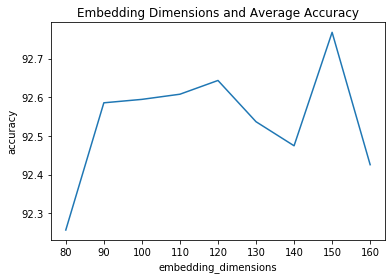

In [33]:
plt.title('Embedding Dimensions and Average Accuracy')
sns.lineplot(avg_accuracy_embedding_dims.index, 100*avg_accuracy_embedding_dims['accuracy'])

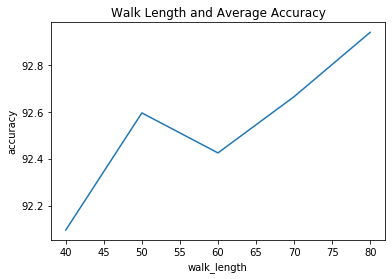

In [34]:
plt.title('Walk Length and Average Accuracy')
sns.lineplot(avg_accuracy_walk_length.index, 100*avg_accuracy_walk_length['accuracy'])